# CORD-19 overview

In this notebook, we provide an overview of publication medatata for CORD-19.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [2]:
# load metadata

df_meta = pd.read_csv("datasets_output/df_pub.csv",compression="gzip")
df_datasource = pd.read_csv("datasets_output/sql_tables/datasource.csv",sep="\t",header=None,names=['datasource_metadata_id', 'datasource', 'url'])
df_pub_datasource = pd.read_csv("datasets_output/sql_tables/pub_datasource.csv",sep="\t",header=None,names=['pub_id','datasource_metadata_id'])
df_cord_meta = pd.read_csv("datasets_output/sql_tables/cord19_metadata.csv",sep="\t",header=None,names=['cord19_metadata_id', 'source', 'license', 'full_text_file', 'ms_academic_id',
       'who_covidence', 'sha', 'full_text', 'pub_id'])

In [3]:
df_meta.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,pmid,pmcid,dimensions_id,timestamp
0,0,‘A ticking time bomb’: Scientists worry about ...,"CAPE TOWN, SOUTH AFRICA—Late on Sunday evening...",2020.0,NaN,Science,NaN,NaN,NaN,0.1126/science.abb7331,NaN,NaN,NaN,2020-04-18 09:20:24.986698
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,32036640.0,NaN,pub.1124777091,2020-04-18 09:20:24.986698
2,2,Another Piece of the Puzzle: Human Metapneumov...,BACKGROUND: Each winter respiratory viruses ac...,2008.0,12.0,Archives of Internal Medicine,NaN,NaN,NaN,10.1001/archinte.168.22.2489,19064834.0,pmc2783624,NaN,2020-04-18 09:20:24.986698
3,3,Viral etiology of severe pneumonia among Kenya...,CONTEXT: Pneumonia is the leading cause of chi...,2010.0,5.0,JAMA,NaN,NaN,NaN,10.1001/jama.2010.675,20501927.0,pmc2968755,NaN,2020-04-18 09:20:24.986698
4,4,Critically Ill Patients With Influenza A(H1N1)...,NaN,2014.0,4.0,JAMA,NaN,NaN,NaN,10.1001/jama.2014.2116,24566924.0,pmc6689404,NaN,2020-04-18 09:20:24.986698


In [4]:
df_meta.columns

Index(['pub_id', 'title', 'abstract', 'publication_year', 'publication_month',
       'journal', 'volume', 'issue', 'pages', 'doi', 'pmid', 'pmcid',
       'dimensions_id', 'timestamp'],
      dtype='object')

In [5]:
df_datasource

,datasource_metadata_id,datasource,url
0,0,CORD19,https://pages.semanticscholar.org/coronavirus-...
1,1,Dimensions,https://docs.google.com/spreadsheets/d/1-kTZJZ...
2,2,WHO,https://www.who.int/emergencies/diseases/novel...


#### Select just CORD-19

In [6]:
df_meta = df_meta.merge(df_pub_datasource, how="inner", left_on="pub_id", right_on="pub_id")
df_meta = df_meta.merge(df_datasource, how="inner", left_on="datasource_metadata_id", right_on="datasource_metadata_id")
df_cord19 = df_meta[df_meta.datasource_metadata_id==0]
df_cord19 = df_cord19.merge(df_cord_meta, how="inner", left_on="pub_id", right_on="pub_id")

In [7]:
df_meta.shape

(70823, 17)

In [8]:
df_cord19.shape

(52079, 25)

In [9]:
df_cord19.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,...,datasource,url,cord19_metadata_id,source,license,full_text_file,ms_academic_id,who_covidence,sha,full_text
0,0,‘A ticking time bomb’: Scientists worry about ...,"CAPE TOWN, SOUTH AFRICA—Late on Sunday evening...",2020.0,NaN,Science,NaN,NaN,NaN,0.1126/science.abb7331,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,0,WHO,unk,NaN,NaN,#8463,NaN,NaN
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,1,WHO,unk,NaN,3.003451e+09,#615,NaN,NaN
2,2,Another Piece of the Puzzle: Human Metapneumov...,BACKGROUND: Each winter respiratory viruses ac...,2008.0,12.0,Archives of Internal Medicine,NaN,NaN,NaN,10.1001/archinte.168.22.2489,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,2,PMC,unk,NaN,NaN,NaN,NaN,NaN
3,3,Viral etiology of severe pneumonia among Kenya...,CONTEXT: Pneumonia is the leading cause of chi...,2010.0,5.0,JAMA,NaN,NaN,NaN,10.1001/jama.2010.675,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,3,PMC,unk,NaN,NaN,NaN,NaN,NaN
4,4,Critically Ill Patients With Influenza A(H1N1)...,NaN,2014.0,4.0,JAMA,NaN,NaN,NaN,10.1001/jama.2014.2116,...,CORD19,https://pages.semanticscholar.org/coronavirus-...,4,PMC,unk,NaN,NaN,NaN,NaN,NaN


#### Publication years

In [10]:
import re

def clean_year(s):
    if pd.isna(s):
        return np.nan
    if not (s>1900):
        return np.nan
    elif s>2020:
        return 2020
    return s

df_cord19["publication_year"] = df_cord19["publication_year"].apply(clean_year)

In [11]:
df_cord19.publication_year.describe()

count    52074.000000
mean      2011.070745
std          8.750593
min       1951.000000
25%       2007.000000
50%       2013.000000
75%       2018.000000
max       2020.000000
Name: publication_year, dtype: float64

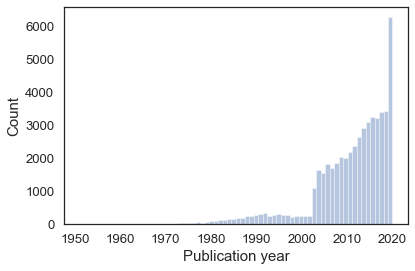

In [12]:
sns.distplot(df_cord19.publication_year.tolist(), bins=70, kde=False)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/publication_year_all.pdf")

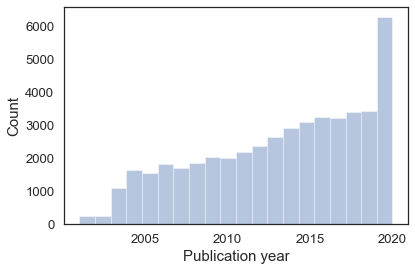

In [13]:
sns.distplot(df_cord19[(pd.notnull(df_cord19.publication_year)) & (df_cord19.publication_year > 2000)].publication_year.tolist(), bins=20, hist=True, kde=False)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/publication_year_2000.pdf")

In [14]:
# recent uptake
df_cord19[df_cord19.publication_year>2018].groupby([(df_cord19.publication_year),(df_cord19.publication_month)]).count().pub_id

publication_year  publication_month
2019.0            1.0                   263
                  2.0                   293
                  3.0                   300
                  4.0                   317
                  5.0                   271
                  6.0                   278
                  7.0                   256
                  8.0                   249
                  9.0                   237
                  10.0                  287
                  11.0                  267
                  12.0                  400
2020.0            1.0                   535
                  2.0                   956
                  3.0                  2212
                  4.0                  2063
                  5.0                   118
                  6.0                    78
                  7.0                    26
                  8.0                    13
                  9.0                     1
                  10.0                  

#### Null values

In [15]:
df_cord19.shape

(52079, 25)

In [16]:
df_cord19["abstract_length"] = df_cord19.abstract.str.len()

In [17]:
df_cord19[df_cord19.abstract_length>0].shape

(42766, 26)

In [18]:
sum(pd.notnull(df_cord19.abstract))

42766

In [19]:
sum(pd.notnull(df_cord19.doi))

49060

In [20]:
sum(pd.notnull(df_cord19.pmcid))

44304

In [21]:
sum(pd.notnull(df_cord19.pmid))

39038

In [22]:
sum(pd.notnull(df_cord19.journal))

48405

#### Journals

In [23]:
df_cord19.journal.value_counts()[:30]

Journal of Virology                                1750
PLoS One                                           1558
medRxiv                                            1221
Virology                                            868
Emerg Infect Dis                                    741
The Lancet                                          632
Viruses                                             568
Arch Virol                                          501
Virus Research                                      500
Vaccine                                             484
Sci Rep                                             480
Veterinary Microbiology                             443
Journal of Virological Methods                      393
Journal of Clinical Virology                        385
The Lancet Infectious Diseases                      373
PLoS Pathog                                         357
Virol J                                             356
Antiviral Research                              

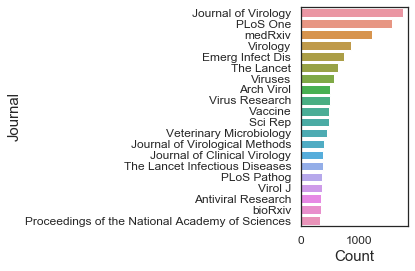

In [24]:
df_sub = df_cord19[df_cord19.journal.isin(df_cord19.journal.value_counts()[:20].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/journals.pdf")

#### Sources and licenses

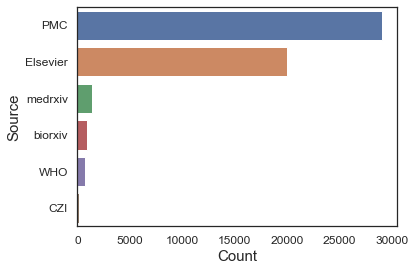

In [25]:
# source
df_sub = df_cord19[df_cord19.source.isin(df_cord19.source.value_counts()[:30].index.tolist())]
b = sns.countplot(y="source", data=df_sub, order=df_sub['source'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/sources.pdf")

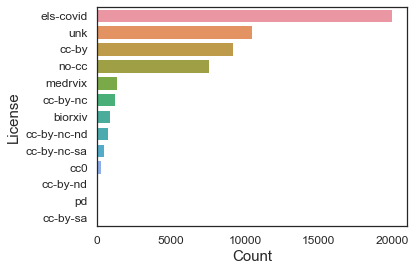

In [26]:
# license
df_sub = df_cord19[df_cord19.license.isin(df_cord19.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/licenses.pdf")

#### Full text availability

In [27]:
df_cord19["has_full_text"] = pd.notnull(df_cord19.full_text)

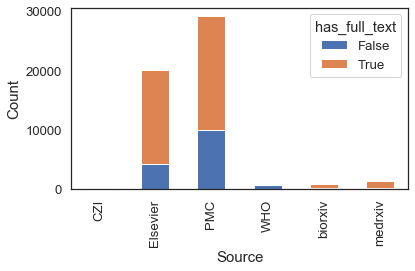

In [28]:
# full text x source
df_plot = df_cord19.groupby(['has_full_text', 'source']).size().reset_index().pivot(columns='has_full_text', index='source', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xlabel("Source", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/source_ft.pdf")

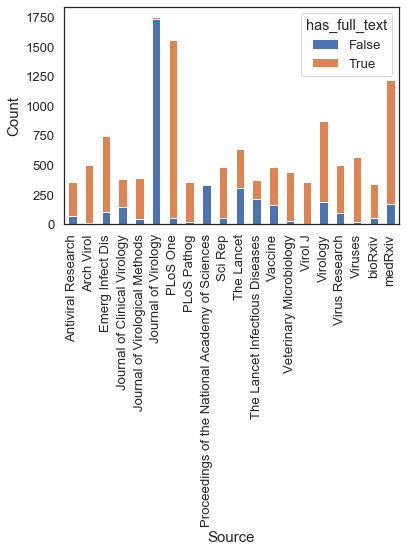

In [29]:
# full text x journal
df_sub = df_cord19[df_cord19.journal.isin(df_cord19.journal.value_counts()[:20].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xlabel("Source", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/journal_ft.pdf")

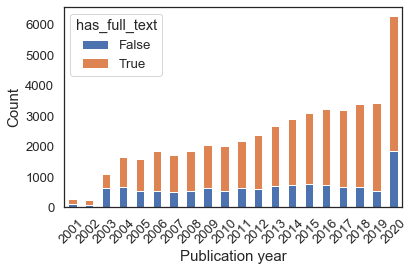

In [30]:
# full text x year
df_sub = df_cord19[(pd.notnull(df_cord19.publication_year)) & (df_cord19.publication_year > 2000)]
df_plot = df_sub.groupby(['has_full_text', 'publication_year']).size().reset_index().pivot(columns='has_full_text', index='publication_year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xticks(np.arange(20), [int(x) for x in df_plot.index.values], rotation=45)
plt.xlabel("Publication year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/year_ft.pdf")

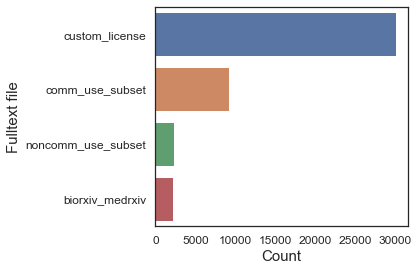

In [31]:
# full text file

df_sub = df_cord19[df_cord19.full_text_file.isin(df_cord19.full_text_file.value_counts()[:20].index.tolist())]
b = sns.countplot(y="full_text_file", data=df_sub, order=df_sub['full_text_file'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Fulltext file",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/license_ft.pdf")

## Dimensions

In [32]:
# load Dimensions data (you will need to download it on your own!)

directory_name = "datasets_output/json_dimensions_cwts"

all_dimensions = list()
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [33]:
df_dimensions = pd.DataFrame.from_dict({
    "id":[r["id"] for r in all_dimensions],
    "publication_type":[r["publication_type"] for r in all_dimensions],
    "doi":[r["doi"] for r in all_dimensions],
    "pmid":[r["pmid"] for r in all_dimensions],
    "issn":[r["journal"]["issn"] for r in all_dimensions],
    "times_cited":[r["times_cited"] for r in all_dimensions],
    "relative_citation_ratio":[r["relative_citation_ratio"] for r in all_dimensions],
    "for_top":[r["for"][0]["first_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "for_bottom":[r["for"][0]["second_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "open_access_versions":[r["open_access_versions"] for r in all_dimensions]
})

In [34]:
df_dimensions.head()

,id,publication_type,doi,pmid,issn,times_cited,relative_citation_ratio,for_top,for_bottom,open_access_versions
0,pub.1117509804,article,10.1128/jvi.00490-19,31243130,0022-538X,0,NaN,Medical and Health Sciences,Medical Microbiology,[]
1,pub.1117412644,article,10.1128/jvi.00714-19,31243124,0022-538X,0,NaN,Biological Sciences,Genetics,[]
2,pub.1117412640,article,10.1128/jvi.00240-19,31243125,0022-538X,3,NaN,Medical and Health Sciences,Neurosciences,[]
3,pub.1117509802,article,10.1128/jvi.00564-19,31243128,0022-538X,5,NaN,Biological Sciences,Genetics,[]
4,pub.1117293115,article,10.1128/jvi.00505-19,31217243,0022-538X,1,NaN,Medical and Health Sciences,Medical Microbiology,[]


In [35]:
df_dimensions.pmid = df_dimensions.pmid.astype(float)

In [36]:
df_dimensions.shape

(59457, 10)

In [37]:
df_joined_doi = df_cord19[pd.notnull(df_cord19.doi)].merge(df_dimensions[pd.notnull(df_dimensions.doi)], how="inner", left_on="doi", right_on="doi")

In [38]:
df_joined_doi.shape

(49278, 36)

In [39]:
df_joined_pmid = df_cord19[pd.isnull(df_cord19.doi) & pd.notnull(df_cord19.pmid)].merge(df_dimensions[pd.isnull(df_dimensions.doi) & pd.notnull(df_dimensions.pmid)], how="inner", left_on="pmid", right_on="pmid")

In [40]:
df_joined_pmid.shape

(975, 36)

In [41]:
df_joined = pd.concat([df_joined_doi,df_joined_pmid])

In [42]:
# nearly all publications from CORD-19 are in Dimensions

In [43]:
df_joined.shape

(50253, 39)

In [44]:
df_cord19.shape

(52079, 27)

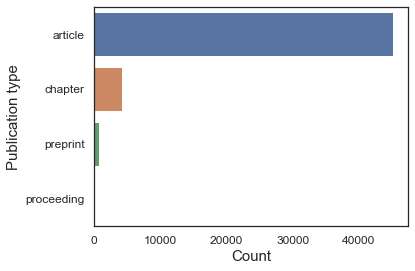

In [45]:
# publication type

df_sub = df_joined[df_joined.publication_type.isin(df_joined.publication_type.value_counts()[:10].index.tolist())]
b = sns.countplot(y="publication_type", data=df_sub, order=df_sub['publication_type'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Publication type",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_pub_type.pdf")

#### Citation counts

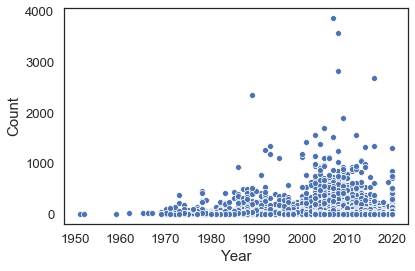

In [46]:
# scatter of citations vs time of publication

sns.scatterplot(df_joined.publication_year.to_list(),df_joined.times_cited.to_list())
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.savefig("figures/dim_citations_year.pdf")

In [47]:
# most cited papers

df_joined[["title","times_cited","relative_citation_ratio","journal","publication_year","doi"]].sort_values("times_cited",ascending=False).head(20)

,title,times_cited,relative_citation_ratio,journal,publication_year,doi
28975,Infectious Diseases Society of America/America...,3878,108.91,Clin Infect Dis,2007.0,10.1086/511159
22332,Epidemiology and causes of preterm birth,3572,118.32,The Lancet,2008.0,10.1016/s0140-6736(08)60074-4
26274,Global trends in emerging infectious diseases,2832,70.32,Nature,2008.0,10.1038/nature06536
28608,Guidelines for the use and interpretation of a...,2684,207.35,Autophagy,2016.0,10.1080/15548627.2015.1100356
21933,Biology of Natural Killer Cells,2361,47.85,Advances in Immunology,1989.0,10.1016/s0065-2776(08)60664-1
26552,Knocking down barriers: advances in siRNA deli...,1909,47.46,Nat Rev Drug Discov,2009.0,10.1038/nrd2742
13677,Antimicrobial activity of flavonoids,1708,35.02,International Journal of Antimicrobial Agents,2005.0,10.1016/j.ijantimicag.2005.09.002
22119,Coronavirus as a possible cause of severe acut...,1571,34.25,The Lancet,2003.0,10.1016/s0140-6736(03)13077-2
27840,Isolation of a novel coronavirus from a man wi...,1556,56.64,N Engl J Med,2012.0,10.1056/nejmoa1211721
9200,2007 Guideline for Isolation Precautions: Prev...,1516,36.68,American Journal of Infection Control,2007.0,10.1016/j.ajic.2007.10.007


In [48]:
# same but in 2020; note that duplicates are due to SI or pre-prints with different PMIDs

df_joined[df_joined.publication_year>2019][["title","times_cited","relative_citation_ratio","journal","publication_year","doi"]].sort_values("times_cited",ascending=False).head(10)

,title,times_cited,relative_citation_ratio,journal,publication_year,doi
22556,Clinical features of patients infected with 20...,1307,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30183-5
27847,A Novel Coronavirus from Patients with Pneumon...,865,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001017
27850,"Early Transmission Dynamics in Wuhan, China, o...",756,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001316
10,Clinical Characteristics of 138 Hospitalized P...,719,NaN,JAMA,2020.0,10.1001/jama.2020.1585
22561,Epidemiological and clinical characteristics o...,719,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30211-7
27851,Clinical Characteristics of Coronavirus Diseas...,513,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2002032
26940,A pneumonia outbreak associated with a new cor...,501,NaN,Nature,2020.0,10.1038/s41586-020-2012-7
22555,A familial cluster of pneumonia associated wit...,493,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30154-9
22565,Genomic characterisation and epidemiology of 2...,416,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30251-8
22,Characteristics of and Important Lessons From ...,352,NaN,JAMA,2020.0,10.1001/jama.2020.2648


In [49]:
# most cited journals

df_joined[['journal','times_cited']].groupby('journal').sum().sort_values('times_cited',ascending=False).head(20)

,times_cited
journal,
Journal of Virology,77947
The Lancet,40329
PLoS One,35217
Proceedings of the National Academy of Sciences,35213
Virology,33802
Emerg Infect Dis,31672
Nature,22790
PLoS Pathog,19362
Journal of Clinical Microbiology,15917


#### Categories

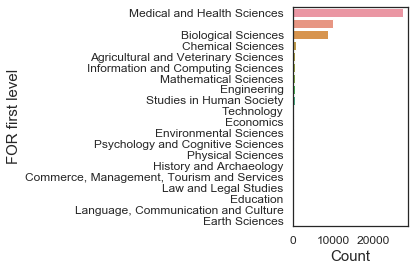

In [50]:
# FOR jeywords distribution, TOP

df_sub = df_joined[df_joined.for_top.isin(df_joined.for_top.value_counts()[:20].index.tolist())]
b = sns.countplot(y="for_top", data=df_sub, order=df_sub['for_top'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("FOR first level",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_for_top.pdf")

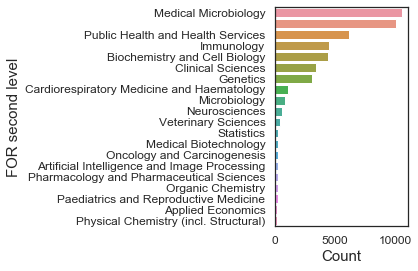

In [51]:
# FOR jeywords distribution, TOP

df_sub = df_joined[df_joined.for_bottom.isin(df_joined.for_bottom.value_counts()[:20].index.tolist())]
b = sns.countplot(y="for_bottom", data=df_sub, order=df_sub['for_bottom'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("FOR second level",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig("figures/dim_for_bottom.pdf")